In [1]:
import pandas as pd

train = pd.read_csv('./Data/train.csv')
test = pd.read_csv('./Data/test.csv')

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


survived: 0 no, 1 yes  
pbclass: Ticket class 1st, 2nd, 3rd  
sibsp: # of siblings on titanic  
parch: # of parents / children on titanic  
ticket: Ticket number  
cabin: Cabin number  
embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton  

In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Some missing data in age, cabin, embarked

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 20)
import seaborn as sns
sns.set()

In [10]:
def bar_chart(feature):
    if not feature in train:
        print("Incorrect key")
        return
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train["Survived"] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ["Survived", "Dead"]
    df.plot(kind="bar",stacked=True, figsize=(10, 5))

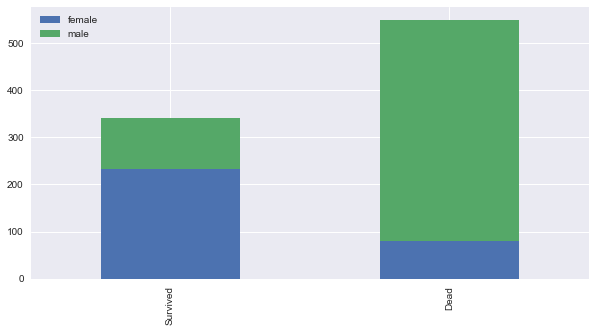

In [11]:
bar_chart("Sex")

Woman more likely to survive than men are

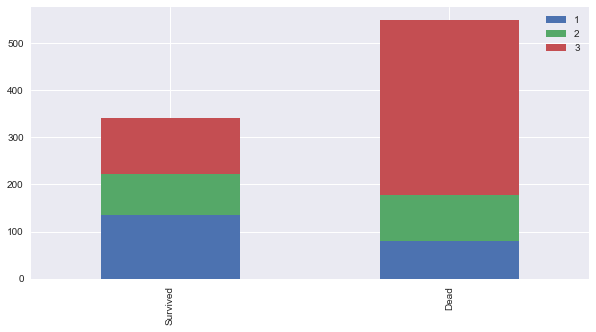

In [12]:
bar_chart("Pclass")

More 3rd class people died in raw numbers

In [13]:
print("1st ratio: ", train[train["Pclass"] == 1]["Pclass"].count()/(train["Pclass"].count()))
print("2nd ratio: ", train[train["Pclass"] == 2]["Pclass"].count()/(train["Pclass"].count()))
print("3rd ratio: ", train[train["Pclass"] == 3]["Pclass"].count()/(train["Pclass"].count()))

1st ratio:  0.24242424242424243
2nd ratio:  0.20650953984287318
3rd ratio:  0.5510662177328844


In [14]:
print("1st survived: ", train[(train["Pclass"] == 1) & (train["Survived"] == 1)]["Pclass"].count()/(train["Pclass"].count()))
print("2nd survived: ", train[(train["Pclass"] == 2) & (train["Survived"] == 1)]["Pclass"].count()/(train["Pclass"].count()))
print("3rd survived: ", train[(train["Pclass"] == 3) & (train["Survived"] == 1)]["Pclass"].count()/(train["Pclass"].count()))

1st survived:  0.1526374859708193
2nd survived:  0.09764309764309764
3rd survived:  0.1335578002244669


People in first class more likely to survive

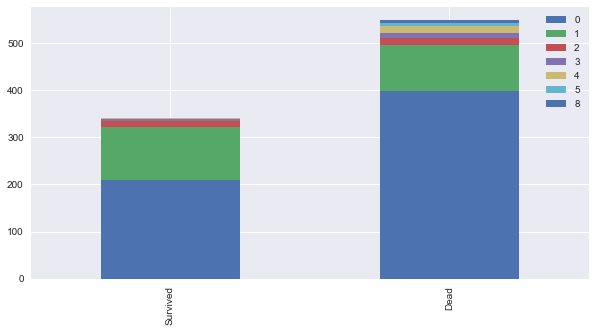

In [15]:
bar_chart("SibSp")

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
def refresh_data():
    train = pd.read_csv('./Data/train.csv')
    test = pd.read_csv('./Data/test.csv')
    return [train, test]

In [18]:
total_data = refresh_data()
train = total_data[0]
test = total_data[1]

for dataset in total_data:
    dataset["Title"] = dataset["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)

In [19]:
title_map = {"Mr": 0, "Miss": 1, "Mrs": 2}

In [20]:
for dataset in total_data:
    dataset["Title"] = dataset["Title"].map(title_map, na_action=None)
    dataset["Title"].fillna(value=3, inplace=True)

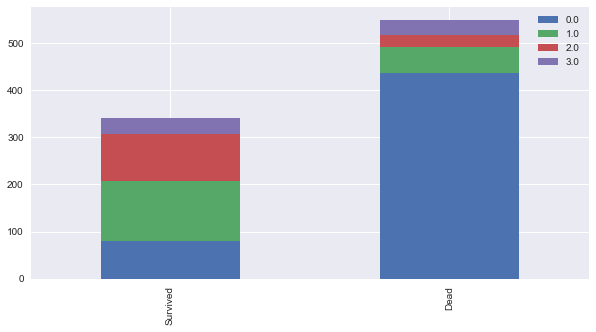

In [21]:
bar_chart("Title")

In [22]:
train.drop("Name", inplace=True, axis=1)
test.drop("Name", inplace=True, axis=1)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null float64
dtypes: float64(3), int64(5), object(4)
memory usage: 83.6+ KB


In [24]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null float64
dtypes: float64(3), int64(5), object(4)
memory usage: 83.6+ KB


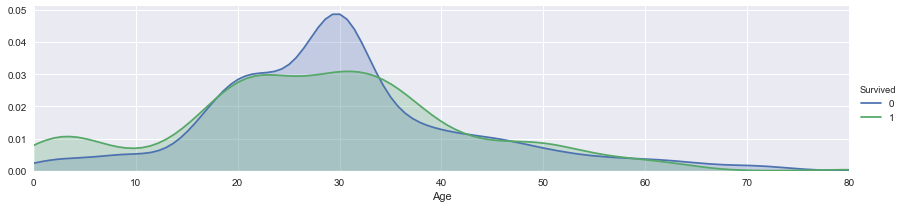

In [26]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.show()

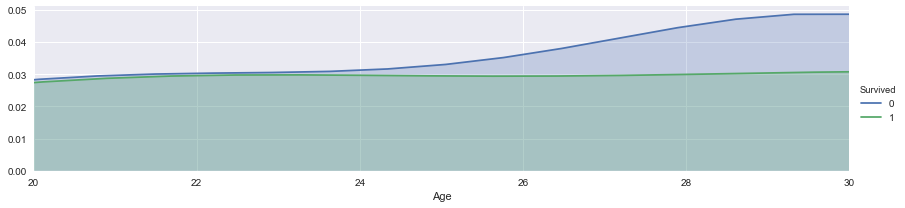

In [27]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.xlim(20, 30)
plt.show()

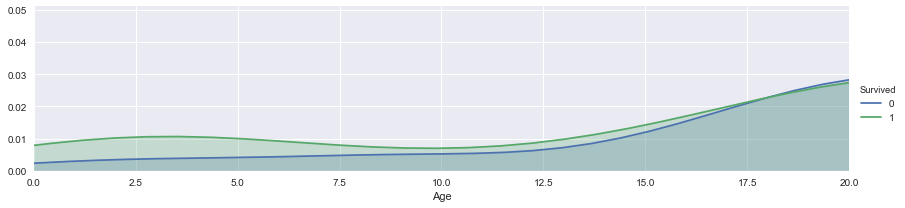

In [28]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.xlim(0, 20)
plt.show()

In [29]:
for dataset in total_data:
    dataset.loc[dataset["Age"] <= 16, 'Age'] = 0
    dataset.loc[(dataset["Age"] > 16) & (dataset["Age"] <= 26), 'Age'] = 1
    dataset.loc[(dataset["Age"] > 26) & (dataset["Age"] <= 36), 'Age'] = 2
    dataset.loc[(dataset["Age"] > 36) & (dataset["Age"] <= 62), 'Age'] = 3
    dataset.loc[(dataset["Age"] > 62), 'Age'] = 4

Child: 0  
Young Adult: 1  
Middle Age: 2  
Late Age: 3  
Senior: 4  

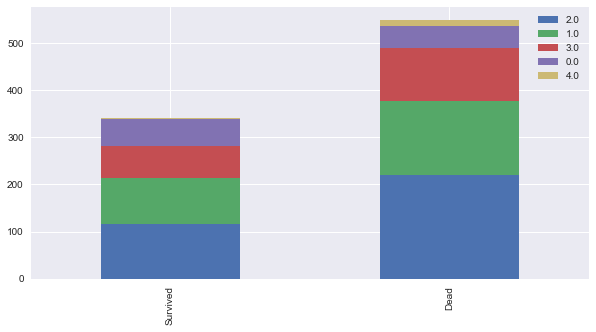

In [30]:
bar_chart("Age")

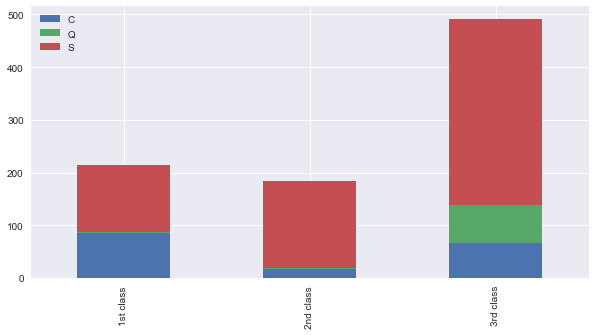

In [31]:
Pclass1 = train[train["Pclass"] == 1]["Embarked"].value_counts()
Pclass2 = train[train["Pclass"] == 2]["Embarked"].value_counts()
Pclass3 = train[train["Pclass"] == 3]["Embarked"].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind="bar", stacked=True, figsize=(10, 5))

plt.show()

More than 50% embarked in Southampton for all three classes

In [32]:
for dataset in total_data:
    dataset["Embarked"].fillna("S", inplace=True)

In [33]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [34]:
train[train["Fare"] == 0]["Fare"]

179    0.0
263    0.0
271    0.0
277    0.0
302    0.0
413    0.0
466    0.0
481    0.0
597    0.0
633    0.0
674    0.0
732    0.0
806    0.0
815    0.0
822    0.0
Name: Fare, dtype: float64

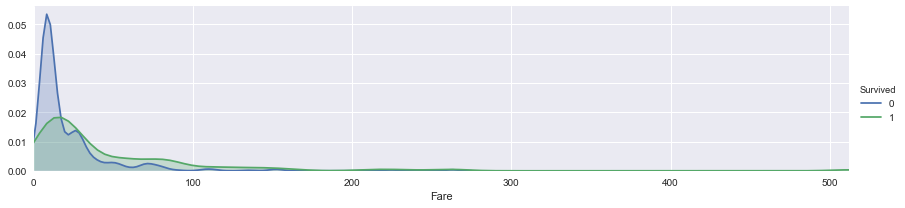

In [35]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Fare", shade=True)
facet.set(xlim=(0, train["Fare"].max()))
facet.add_legend()

plt.show()

In [36]:
for dataset in total_data:
    dataset.loc[dataset["Fare"] <= 17, "Fare"] = 0
    dataset.loc[(dataset["Fare"] > 17) & (dataset["Fare"] <= 30), "Fare"] = 1
    dataset.loc[(dataset["Fare"] > 30) & (dataset["Fare"] <= 100), "Fare"] = 2
    dataset.loc[dataset["Fare"] > 100, "Fare"] = 3

In [37]:
train.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
C22 C26        3
D              3
F33            3
F2             3
E101           3
B22            2
F4             2
B58 B60        2
D36            2
B28            2
D17            2
B49            2
C52            2
C126           2
C124           2
D33            2
F G73          2
E44            2
E67            2
E25            2
B77            2
C2             2
B5             2
E121           2
B18            2
D20            2
C123           2
              ..
B69            1
B82 B84        1
A24            1
D21            1
E49            1
D19            1
E10            1
C104           1
A19            1
D50            1
B38            1
B30            1
E38            1
E40            1
C70            1
C118           1
E77            1
D49            1
C87            1
B101           1
C99            1
C47            1
C7             1
E36            1
A16            1
C91            1
F E69          1
C111          

In [38]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in total_data:
    dataset["Cabin"] = dataset["Cabin"].str[:1]
    dataset["Cabin"] = dataset["Cabin"].map(cabin_mapping)

In [39]:
train.head(15)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,1.0,1,0,A/5 21171,0.0,NaN,S,0.0
1,2,1,1,female,3.0,1,0,PC 17599,2.0,0.8,C,2.0
2,3,1,3,female,1.0,0,0,STON/O2. 3101282,0.0,NaN,S,1.0
3,4,1,1,female,2.0,1,0,113803,2.0,0.8,S,2.0
4,5,0,3,male,2.0,0,0,373450,0.0,NaN,S,0.0
5,6,0,3,male,2.0,0,0,330877,0.0,NaN,Q,0.0
6,7,0,1,male,3.0,0,0,17463,2.0,1.6,S,0.0
7,8,0,3,male,0.0,3,1,349909,1.0,NaN,S,3.0
8,9,1,3,female,2.0,0,2,347742,0.0,NaN,S,2.0
9,10,1,2,female,0.0,1,0,237736,2.0,NaN,C,2.0


In [40]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

Family size:

In [41]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

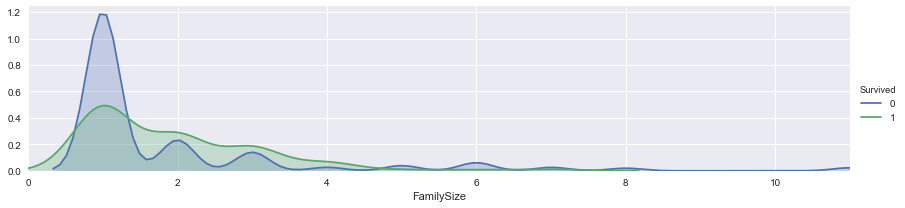

In [42]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "FamilySize", shade=True)
facet.set(xlim=(0, train["FamilySize"].max()))
facet.add_legend()

plt.show()

In [43]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,male,1.0,1,0,A/5 21171,0.0,2.0,S,0.0,2
1,2,1,1,female,3.0,1,0,PC 17599,2.0,0.8,C,2.0,2
2,3,1,3,female,1.0,0,0,STON/O2. 3101282,0.0,2.0,S,1.0,1
3,4,1,1,female,2.0,1,0,113803,2.0,0.8,S,2.0,2
4,5,0,3,male,2.0,0,0,373450,0.0,2.0,S,0.0,1


Convert sex to numbers:

In [44]:
sex_map = {"male": 0, "female": 1}
for dataset in total_data:
    dataset["Sex"] = dataset["Sex"].map(sex_map)

Convert embarkment port to numbers:

In [45]:
embark_map = {"S": 0, "C": 1, "Q": 2}
for dataset in total_data:
    dataset["Embarked"] = dataset["Embarked"].map(embark_map)

Drop unneeded features:

In [46]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [47]:
train.to_csv("./Data/train_clean.csv", index=False)
test.to_csv("./Data/test_clean.csv", index=False)